In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string


import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D , BatchNormalization
from tensorflow.keras import utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#import train and test csv
train_df = pd.read_csv('./data/sign_mnist_train.csv')
test_df = pd.read_csv('./data/sign_mnist_test.csv')

In [3]:
#Dictionary for labels
label_dic = {i:string.ascii_uppercase[i] for i in range(26)}

In [4]:
#delete J and Z - they involve movement and are not part of this image set
label_dic.pop(9)
label_dic.pop(25)

'Z'

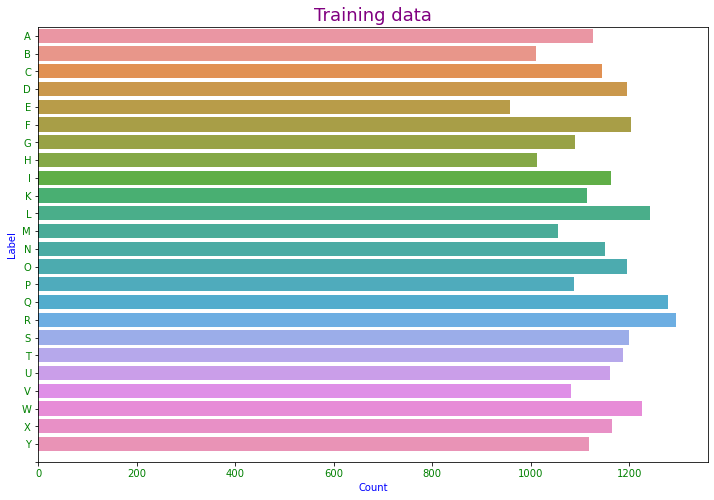

In [5]:
#checking for any class imbalances
plt.figure(figsize=(12,8))
sns.countplot(y='label',data = train_df)
plt.title('Training data',color= 'purple',fontsize = 18)
plt.yticks(ticks =list(range(25)), labels = list(label_dic.values()),color = 'green')
plt.xticks(color='green')
plt.xlabel('Count',color = 'blue')
plt.ylabel('Label',color = 'blue');

In [6]:
y_train = train_df['label']
y_test = test_df['label']
y_test_labels = test_df['label']

In [7]:
X_train = train_df.drop(columns = 'label').values
X_test = test_df.drop(columns = 'label').values

In [8]:
type(X_train) , X_train.shape

(numpy.ndarray, (27455, 784))

In [9]:
X_train = X_train.reshape(X_train.shape[0],28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)

In [10]:
X_train.shape

(27455, 28, 28)

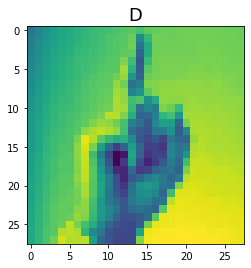

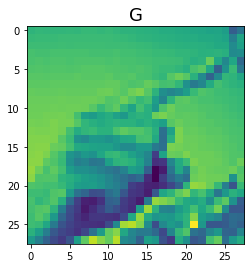

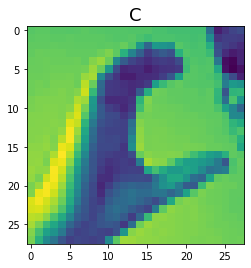

In [11]:
#Visualize a few images
for i in range(3):
    plt.imshow(X_train[i])
    plt.title(label_dic[y_train[i]],fontsize = 18)
    plt.show()

In [12]:
X_train.shape, X_test.shape, y_train.shape , y_test.shape

((27455, 28, 28), (7172, 28, 28), (27455,), (7172,))

In [13]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [14]:
X_train.shape, X_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

In [15]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [16]:
X_train.shape

(27455, 28, 28, 1)

In [17]:
X_test.shape

(7172, 28, 28, 1)

In [18]:
X_train[0].shape

(28, 28, 1)

In [19]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

## CNN Model

In [25]:
#Instantiate model
cnn = Sequential()

#Conv layer1
cnn.add(Conv2D(filters = 6,
              kernel_size = (3,3),
              activation = 'relu',
              input_shape = (28,28,1)
              ))

#MaxPool layer1
cnn.add(MaxPooling2D(pool_size = (2,2)))

#Conv layer2
cnn.add(Conv2D(filters = 16,
              kernel_size = (3,3),
              activation = 'relu'
              ))

#MaxPool2
cnn.add(MaxPooling2D(pool_size = (2,2)))

#Flatten
cnn.add(Flatten())

#Dense Layers
cnn.add(Dense(128,activation = 'relu'))
cnn.add(Dense(32,activation = 'relu'))
cnn.add(Dense(25, activation = 'softmax'))

In [26]:
#Compile
cnn.compile(loss = 'categorical_crossentropy',
           optimizer = 'adam',
           metrics = ['accuracy'])

In [28]:
#
history = cnn.fit(X_train,y_train , validation_data = (X_test,y_test),
                  batch_size = 256,
                  epochs = 10,
                  verbose =1)

Epoch 1/10
108/108 [==============================] - 5s 46ms/step - loss: 3.0797 - accuracy: 0.0980 - val_loss: 2.2569 - val_accuracy: 0.2736
Epoch 2/10
108/108 [==============================] - 5s 44ms/step - loss: 1.9255 - accuracy: 0.4015 - val_loss: 1.5883 - val_accuracy: 0.4856
Epoch 3/10
108/108 [==============================] - 4s 40ms/step - loss: 1.2715 - accuracy: 0.5960 - val_loss: 1.2032 - val_accuracy: 0.6234
Epoch 4/10
108/108 [==============================] - 4s 41ms/step - loss: 0.8505 - accuracy: 0.7408 - val_loss: 0.9844 - val_accuracy: 0.6803
Epoch 5/10
108/108 [==============================] - 7s 62ms/step - loss: 0.6040 - accuracy: 0.8229 - val_loss: 0.8562 - val_accuracy: 0.7020
Epoch 6/10
108/108 [==============================] - 6s 59ms/step - loss: 0.4536 - accuracy: 0.8628 - val_loss: 0.6692 - val_accuracy: 0.7625
Epoch 7/10
108/108 [==============================] - 5s 49ms/step - loss: 0.3271 - accuracy: 0.9089 - val_loss: 0.6160 - val_accuracy: 0.7790

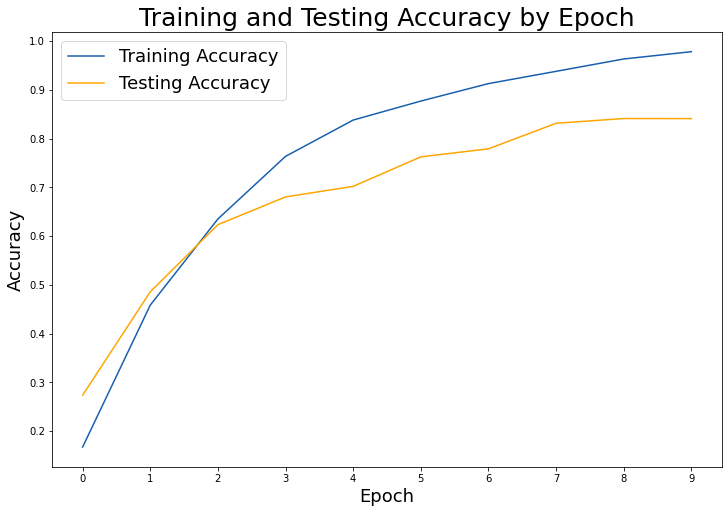

In [31]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Accuracy', color='#185fad')
plt.plot(test_acc, label='Testing Accuracy', color='orange')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

Tuning the model

In [32]:

#Instantiate model
cnn_d = Sequential()

#Conv layer1
cnn_d.add(Conv2D(filters = 75,
              kernel_size = (3,3),
              activation = 'relu',
              input_shape = (28,28,1)
              ))
cnn_d.add(BatchNormalization())

#MaxPool layer1
cnn_d.add(MaxPooling2D(pool_size = (2,2)))

#Conv layer2
cnn_d.add(Conv2D(filters = 50,
              kernel_size = (3,3),
              activation = 'relu'
              ))
cnn_d.add(Dropout(0.2))
cnn_d.add(BatchNormalization())

cnn_d.add(MaxPooling2D(pool_size = (2,2)))


#Conv layer3
cnn_d.add(Conv2D(filters = 20,
              kernel_size = (3,3),
              activation = 'relu'
              ))
cnn_d.add(Dropout(0.2))
cnn_d.add(BatchNormalization())
#MaxPool3
cnn_d.add(MaxPooling2D(pool_size = (2,2)))

#Flatten
cnn_d.add(Flatten())

#Dense Layers
cnn_d.add(Dense(128,activation = 'relu'))
cnn_d.add(Dropout(0.2))
cnn_d.add(Dense(32,activation = 'relu'))
cnn_d.add(Dense(25, activation = 'softmax'))

In [33]:
cnn_d.compile(loss = 'categorical_crossentropy',
           optimizer = 'adam',
           metrics = ['accuracy'])

In [34]:
history_d = cnn_d.fit(X_train,y_train , validation_data = (X_test,y_test),
                  batch_size = 128,
                  epochs = 14,
                  verbose =1)

Epoch 1/14
215/215 [==============================] - 57s 263ms/step - loss: 2.3553 - accuracy: 0.3157 - val_loss: 3.2468 - val_accuracy: 0.0374
Epoch 2/14
215/215 [==============================] - 47s 221ms/step - loss: 0.3910 - accuracy: 0.8697 - val_loss: 2.9815 - val_accuracy: 0.1373
Epoch 3/14
215/215 [==============================] - 60s 279ms/step - loss: 0.1637 - accuracy: 0.9463 - val_loss: 0.6498 - val_accuracy: 0.7928
Epoch 4/14
215/215 [==============================] - 47s 216ms/step - loss: 0.1008 - accuracy: 0.9673 - val_loss: 0.5188 - val_accuracy: 0.8461
Epoch 5/14
215/215 [==============================] - 48s 222ms/step - loss: 0.0814 - accuracy: 0.9728 - val_loss: 0.4380 - val_accuracy: 0.8615
Epoch 6/14
215/215 [==============================] - 40s 185ms/step - loss: 0.0631 - accuracy: 0.9794 - val_loss: 0.3719 - val_accuracy: 0.8677
Epoch 7/14
215/215 [==============================] - 40s 185ms/step - loss: 0.0578 - accuracy: 0.9813 - val_loss: 0.5436 - val_ac

In [35]:
cnn_d.evaluate(X_train, y_train)

858/858 [==============================] - 11s 13ms/step - loss: 0.0407 - accuracy: 0.9867


[0.04074987769126892, 0.98666912317276]

In [36]:
cnn_d.evaluate(X_test, y_test)

225/225 [==============================] - 3s 15ms/step - loss: 0.3223 - accuracy: 0.8960


[0.3223087787628174, 0.895984411239624]

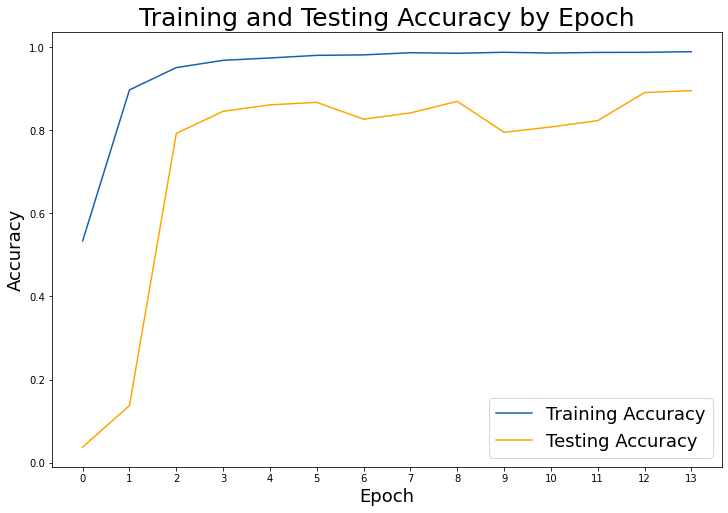

In [38]:
train_acc = history_d.history['accuracy']
test_acc = history_d.history['val_accuracy']
epoch_labels = history_d.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Accuracy', color='#185fad')
plt.plot(test_acc, label='Testing Accuracy', color='orange')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

Our model is still overfit. Try some image augmentation to create more data

In [39]:
#https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/
augmentdata = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


augmentdata.fit(X_train)

In [40]:

#Instantiate model
cnn_aug = Sequential()

#Conv layer1
cnn_aug.add(Conv2D(filters = 75,
              kernel_size = (3,3),
              activation = 'relu',
              input_shape = (28,28,1)
              ))
cnn_aug.add(BatchNormalization())

#MaxPool layer1
cnn_aug.add(MaxPooling2D(pool_size = (2,2)))

#Conv layer2
cnn_aug.add(Conv2D(filters = 50,
              kernel_size = (3,3),
              activation = 'relu'
              ))
cnn_aug.add(Dropout(0.2))
cnn_aug.add(BatchNormalization())

cnn_aug.add(MaxPooling2D(pool_size = (2,2)))


#Conv layer3
cnn_aug.add(Conv2D(filters = 20,
              kernel_size = (3,3),
              activation = 'relu'
              ))
cnn_aug.add(Dropout(0.2))
cnn_aug.add(BatchNormalization())
#MaxPool3
cnn_aug.add(MaxPooling2D(pool_size = (2,2)))

#Flatten
cnn_aug.add(Flatten())

#Dense Layers
cnn_aug.add(Dense(128,activation = 'relu'))
cnn_aug.add(Dropout(0.2))
cnn_aug.add(Dense(32,activation = 'relu'))
cnn_aug.add(Dense(25, activation = 'softmax'))

In [41]:
cnn_aug.compile(loss = 'categorical_crossentropy',
           optimizer = 'adam',
           metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.00001,
                           patience=2, verbose=1, mode='auto')


In [42]:
history_aug = cnn_aug.fit(augmentdata.flow(X_train,y_train, batch_size = 128) , 
                          validation_data = (X_test,y_test),
                  epochs = 10,
                  verbose =1
#                   ,callbacks=[early_stop]
                         )

Epoch 1/10
215/215 [==============================] - 50s 231ms/step - loss: 2.5358 - accuracy: 0.2323 - val_loss: 3.6082 - val_accuracy: 0.0346
Epoch 2/10
215/215 [==============================] - 44s 203ms/step - loss: 0.9105 - accuracy: 0.6785 - val_loss: 2.6327 - val_accuracy: 0.2255
Epoch 3/10
215/215 [==============================] - 59s 274ms/step - loss: 0.5792 - accuracy: 0.7995 - val_loss: 1.2493 - val_accuracy: 0.6220
Epoch 4/10
215/215 [==============================] - 58s 270ms/step - loss: 0.4620 - accuracy: 0.8419 - val_loss: 0.3940 - val_accuracy: 0.8585
Epoch 5/10
215/215 [==============================] - 54s 253ms/step - loss: 0.3689 - accuracy: 0.8737 - val_loss: 0.4892 - val_accuracy: 0.8242
Epoch 6/10
215/215 [==============================] - 63s 293ms/step - loss: 0.3182 - accuracy: 0.8901 - val_loss: 0.2908 - val_accuracy: 0.8911
Epoch 7/10
215/215 [==============================] - 48s 224ms/step - loss: 0.2800 - accuracy: 0.9048 - val_loss: 0.3649 - val_ac

In [43]:
cnn_aug.evaluate(X_test, y_test)

225/225 [==============================] - 4s 16ms/step - loss: 0.0972 - accuracy: 0.9730


[0.09715306013822556, 0.9729503393173218]

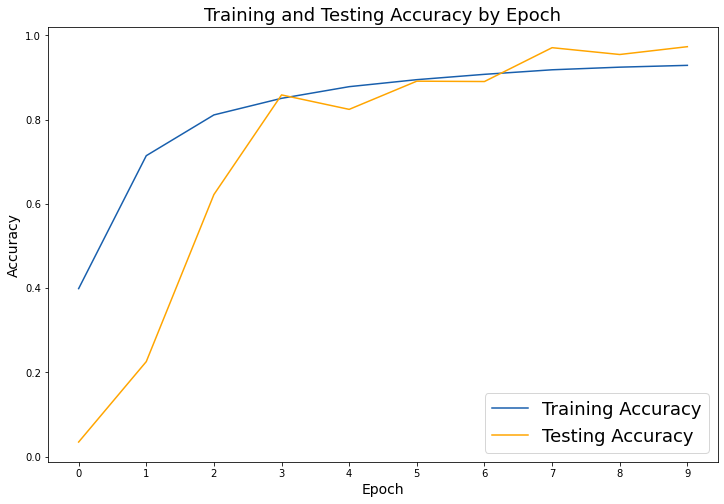

In [45]:
train_acc = history_aug.history['accuracy']
test_acc = history_aug.history['val_accuracy']
epoch_labels = history_aug.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Accuracy', color='#185fad')
plt.plot(test_acc, label='Testing Accuracy', color='orange')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

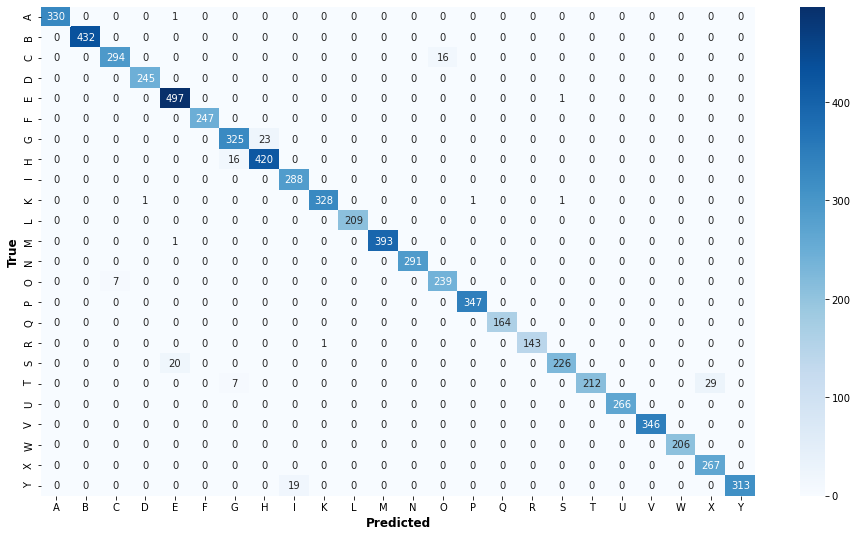

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = cnn_aug.predict(X_test)

plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test_labels , y_pred_labels)

sns.heatmap(cm, 
            annot=True, 
            fmt="d",
            cmap = 'Blues',
            xticklabels = label_dic.values(), 
            yticklabels = label_dic.values()
           )

plt.xlabel('Predicted',fontsize='large', fontweight='bold')
plt.ylabel('True',fontsize='large', fontweight='bold');
            

## Saving the model

In [116]:
#Save the model for use in the webpage
cnn_aug.save('./models')

INFO:tensorflow:Assets written to: ./models/assets
